In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder


In [6]:
# Importing the dataset
df = pd.read_csv('bullet_train.csv - bullet_train.csv.csv')

# Check for missing values
missing_values = dataset.isnull().sum()
print(missing_values)


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Fare          0
dtype: int64


In [20]:
X = df.iloc[:, 1:5].values
Y = df.iloc[:, 0].values

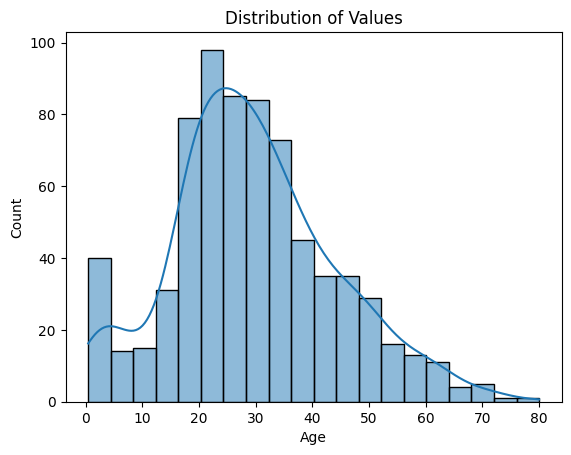

Mean: 29.69911764705882
Median: 28.0
Mode: 24.0


In [8]:
sns.histplot(df['Age'], kde=True)
plt.title("Distribution of Values")
plt.show()

print("Mean:", df['Age'].mean())
print("Median:", df['Age'].median())
print("Mode:", df['Age'].mode()[0])


In [9]:
df['Age'] = df['Age'].replace(0, np.nan).fillna(df['Age'].median())


In [11]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
dtype: int64


In [21]:
# Scaling the numberical values and dividing the categorical columns by One Hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [2, 3]),  # numeric columns
        ('cat', OneHotEncoder(sparse_output=False), [0, 1])  # categorical columns
    ],
    remainder='passthrough'
)

X_processed = preprocessor.fit_transform(X)

# Encode Y
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

In [23]:
from sklearn.model_selection import train_test_split
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y_encoded, test_size=0.2, random_state=31)

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(10, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))

# Adding the second hidden layer
classifier.add(Dense(10, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer for binary classification

classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, Y_train, batch_size = 16, epochs = 50)




Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6065 - loss: 0.6915
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6124 - loss: 0.6825
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5985 - loss: 0.6576
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6178 - loss: 0.5989
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6366 - loss: 0.5627
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7959 - loss: 0.5262
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8171 - loss: 0.5032
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7998 - loss: 0.5135
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7927 - loss: 0.4898
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8239 - loss: 0.4559
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8005 - loss: 0.4583
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7957 - lo

In [30]:
# Predicting the Train set results
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_train)
y_pred = (y_pred > 0.5)
test_accuracy = accuracy_score(Y_train, y_pred)
print('Train accuracy =', test_accuracy)

# Predicting the Test set results
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
test_accuracy = accuracy_score(Y_test, y_pred)
print('Test accuracy =', test_accuracy)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print (cm)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Train accuracy = 0.7949438202247191
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Test accuracy = 0.7877094972067039
[[89 10]
 [28 52]]
